In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
cifar = tf.keras.datasets.cifar10
(x_train , y_train) , (x_test , y_test) = cifar.load_data()
x_train , x_test = x_train / 255.0 , x_test / 255.0

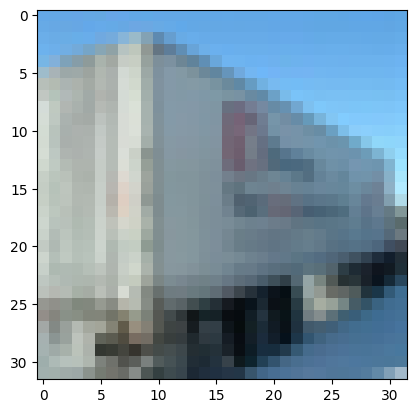

In [4]:
plt.imshow(x_train[15] , cmap="gray")

In [5]:
x_train[15].shape

(32, 32, 3)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32 ,32 ,3)),
    tf.keras.layers.Dense(128 , activation= "relu" ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10  ,activation= "softmax")
])

In [7]:
model.compile(optimizer= "adam" ,
              loss= "sparse_categorical_crossentropy" ,
              metrics= ['accuracy'])

In [8]:
model.fit(x_train , y_train , epochs= 8)
model.evaluate(x_test , y_test)

Epoch 1/8
1563/1563 [==============================] - 15s 9ms/step - loss: 2.0353 - accuracy: 0.2429
Epoch 2/8
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9453 - accuracy: 0.2814
Epoch 3/8
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9205 - accuracy: 0.2897
Epoch 4/8
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9139 - accuracy: 0.2960
Epoch 5/8
1563/1563 [==============================] - 15s 10ms/step - loss: 1.9039 - accuracy: 0.2990
Epoch 6/8
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8967 - accuracy: 0.3042
Epoch 7/8
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8893 - accuracy: 0.3077
Epoch 8/8
313/313 [==============================] - 1s 3ms/step - loss: 1.7856 - accuracy: 0.3507


[1.7855857610702515, 0.3506999909877777]

### accuracy decreased 65 percent compared with mnist dataset. ⏬
### accuracy decreased 50 percent compared with fashion-mnist dataset. 🔽

### لایه فلتن که همه پیکسل ها رو میریزه توی یک آرایه یک بعدی دلیل این دقت پایین است

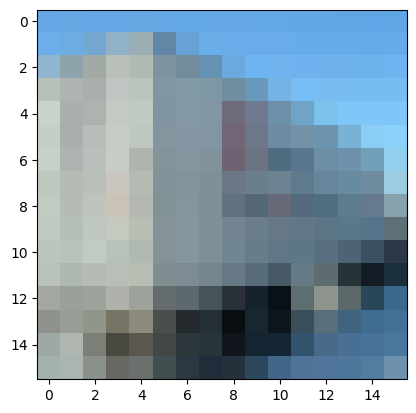

In [9]:
import cv2
truck = cv2.resize(x_train[15] , (16, 16))
plt.imshow(truck)

In [10]:
truck = x_train[15].flatten()
truck.shape
truck = truck.reshape(-1 ,1 )
truck.shape

(3072, 1)

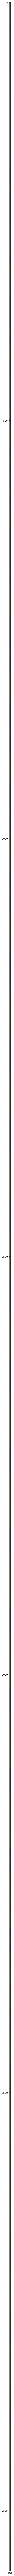

In [11]:
plt.figure(figsize=(200,200))
plt.imshow(truck)
plt.show()

### از روی این تصویر فلت شده نمیتوتن متوجه شد که تصویر  تراک بوده
### پس شبکه هم متوجه محتوای تصویر فلت شده نمیشه و دقت پایین حدودا رندوم میده
### پس تصویر رو مستقیم نباید بدیم لایه فلتن
